# Lead Scoring Case Study

In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',999)
pd.set_option('display.max_rows',200)
pd.set_option('float_format', '{:f}'.format)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
Xed=pd.read_csv('Leads.csv')

## Data Exploration

In [3]:
Xed.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.000000,0,0.000000,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.000000,15.000000,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.000000,674,2.500000,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.000000,15.000000,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.000000,1532,2.000000,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.000000,20.000000,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.000000,305,1.000000,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.000000,17.000000,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.000000,1428,1.000000,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.000000,18.000000,No,No,Modified


In [4]:
Xed.shape

(9240, 37)

In [5]:
Xed.size

341880

In [6]:
Xed.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
Xed.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
Xed.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Data Cleaning

In [9]:
#Number columns null values
count=Xed.isnull().sum().sort_values(ascending = True)
count

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
A free copy of Mastering The Interview              0
Magazine                                            0
Search                                              0
Newspaper Article                                   0
Last Notable Activity                               0
Lead Number                                         0
Lead Origin                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                 

In [10]:
#Drop all columns greater than 3000 missing values
for col in Xed.columns:
    if Xed[col].isnull().sum() > 3000:
        Xed.drop(col, 1, inplace=True)

In [11]:
#Checking for duplicates
sum(Xed.duplicated(subset = 'Prospect ID')) == 0

True

In [12]:
#Checking for duplicates
sum(Xed.duplicated(subset = 'Lead Number')) == 0

True

Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.

In [13]:
Xed.drop(['Lead Number'], axis = 1, inplace = True)
Xed.drop(['Prospect ID'], axis = 1, inplace = True)

In [14]:
Xed.Country.value_counts(normalize = True, dropna = False) * 100

India                  70.259740
NaN                    26.634199
United States           0.746753
United Arab Emirates    0.573593
Singapore               0.259740
Saudi Arabia            0.227273
United Kingdom          0.162338
Australia               0.140693
Qatar                   0.108225
Hong Kong               0.075758
Bahrain                 0.075758
France                  0.064935
Oman                    0.064935
unknown                 0.054113
Kuwait                  0.043290
Canada                  0.043290
Germany                 0.043290
South Africa            0.043290
Nigeria                 0.043290
Sweden                  0.032468
China                   0.021645
Italy                   0.021645
Asia/Pacific Region     0.021645
Netherlands             0.021645
Uganda                  0.021645
Philippines             0.021645
Bangladesh              0.021645
Ghana                   0.021645
Belgium                 0.021645
Tanzania                0.010823
Malaysia  

In [15]:
Xed.City.value_counts(normalize = True, dropna = False) * 100

Mumbai                        34.870130
Select                        24.339827
NaN                           15.367965
Thane & Outskirts              8.138528
Other Cities                   7.424242
Other Cities of Maharashtra    4.945887
Other Metro Cities             4.112554
Tier II Cities                 0.800866
Name: City, dtype: float64

Also we can drop 'City' and 'Country' as it is not going to be very helpful.

In [16]:
Xed.drop(['City'], axis = 1, inplace = True)
Xed.drop(['Country'], axis = 1, inplace = True)

In [17]:
#Recheck coulmns with null values in %
round(Xed.isnull().mean()*100,2).sort_values(ascending = True)


Lead Origin                                      0.000000
I agree to pay the amount through cheque         0.000000
Get updates on DM Content                        0.000000
Update me on Supply Chain Content                0.000000
Receive More Updates About Our Courses           0.000000
Through Recommendations                          0.000000
Digital Advertisement                            0.000000
Newspaper                                        0.000000
X Education Forums                               0.000000
Newspaper Article                                0.000000
Magazine                                         0.000000
A free copy of Mastering The Interview           0.000000
Search                                           0.000000
Total Time Spent on Website                      0.000000
Converted                                        0.000000
Do Not Call                                      0.000000
Do Not Email                                     0.000000
Last Notable A

As 'Select' represents that the particular column was left unchecked, a count of the same would help.

In [18]:
# Replacing 'Select' with NaN (Since it means no option is selected)
Xed = Xed.replace('select',np.nan)

In [19]:
#Name: Specialization, dtype: int64
#Name: How did you hear about X Education, dtype: int64
#Name: Lead Profile, dtype: int64

## The above 3 consists 'Select'. Thus, analyze them seperately.

In [20]:
Xed.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                                           2
Digital Advertisement       

In [21]:
# Checking the percentage of missing values
round(100*(Xed.isnull().sum()/len(Xed.index)), 2)

Lead Origin                                      0.000000
Lead Source                                      0.390000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.480000
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.480000
Last Activity                                    1.110000
Specialization                                  15.560000
How did you hear about X Education              23.890000
What is your current occupation                 29.110000
What matters most to you in choosing a course   29.320000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [22]:
#dropping cols with more than 45% missing values

cols=Xed.columns

for i in cols:
    if((100*(Xed[i].isnull().sum()/len(Xed.index))) >= 35):
        Xed.drop(i, 1, inplace = True)

In [23]:
# Rechecking the percentage of missing values
round(100*(Xed.isnull().sum()/len(Xed.index)), 2)

Lead Origin                                      0.000000
Lead Source                                      0.390000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.480000
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.480000
Last Activity                                    1.110000
Specialization                                  15.560000
How did you hear about X Education              23.890000
What is your current occupation                 29.110000
What matters most to you in choosing a course   29.320000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

Now we can drop a few more columns here which are not useful

In [24]:
#Xed.drop(['X Education Forums', 'Digital Advertisement', 'Through Recommendations'], axis = 1, inplace = True)

In [25]:
round(100*(Xed.isnull().sum()/len(Xed.index)), 2)

Lead Origin                                      0.000000
Lead Source                                      0.390000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.480000
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.480000
Last Activity                                    1.110000
Specialization                                  15.560000
How did you hear about X Education              23.890000
What is your current occupation                 29.110000
What matters most to you in choosing a course   29.320000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

## EDA

In [26]:
Xed['Specialization'].astype('category').value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

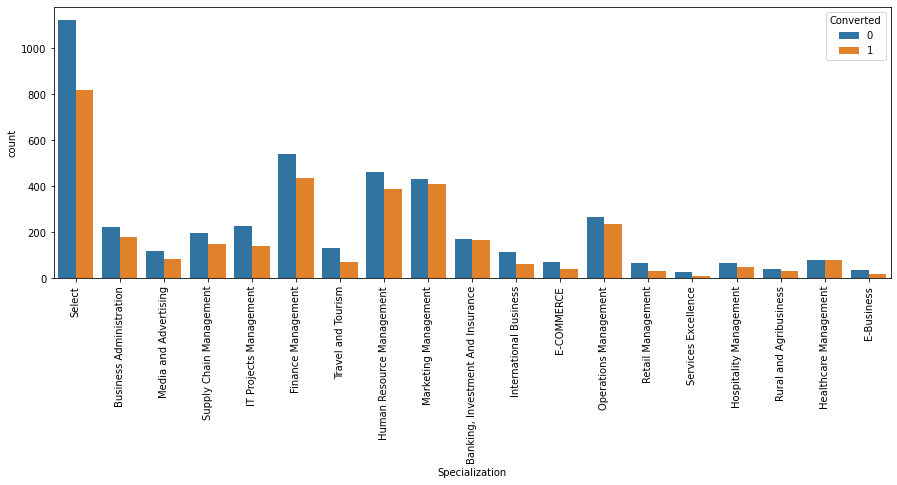

In [27]:
plt.figure(figsize=(15,5))
s1=sns.countplot(Xed.Specialization, hue=Xed.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

From above plot, the Specialization from any Management is high. Thus, the column should not be dropped.

In [28]:
# categorize all management courses
Xed.loc[(Xed.Specialization == 'Finance Management') | (Xed.Specialization == 'Human Resource Management') | 
       (Xed.Specialization == 'Marketing Management') |  (Xed.Specialization == 'Operations Management') |
       (Xed.Specialization == 'IT Projects Management') | (Xed.Specialization == 'Supply Chain Management') |
       (Xed.Specialization == 'Healthcare Management') | (Xed.Specialization == 'Hospitality Management') |
       (Xed.Specialization == 'Retail Management') , 'Specialization'] = 'Management Specializations'

# categorize all busines courses
Xed.loc[(Xed.Specialization == 'Business Administration') | (Xed.Specialization == 'International Business') | 
       (Xed.Specialization == 'Rural and Agribusiness') | (Xed.Specialization == 'E-Business') 
        , 'Specialization'] = 'Business Specializations'

# categorize all industry courses
Xed.loc[(Xed.Specialization == 'Banking, Investment And Insurance') | (Xed.Specialization == 'Media and Advertising') |
       (Xed.Specialization == 'Travel and Tourism') | (Xed.Specialization == 'Services Excellence') |
       (Xed.Specialization == 'E-COMMERCE'), 'Specialization'] = 'Industry Specializations'

In [29]:
Xed.Specialization.value_counts(normalize = True) * 100

Management Specializations   54.511664
Select                       24.891054
Industry Specializations     11.484235
Business Specializations      9.113048
Name: Specialization, dtype: float64

In [30]:
Xed['How did you hear about X Education'].astype('category').value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [31]:
Xed['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [32]:
Xed.drop(['Lead Profile','How did you hear about X Education'],  axis = 1, inplace = True)

In [33]:
Xed.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [35]:
Xed['Specialization'] = Xed['Specialization'].replace(np.nan, 'Not Specified')

In [36]:
# Drop the null values rows in the column 'Specialization'

Xed = Xed[~pd.isnull(Xed['Specialization'])]

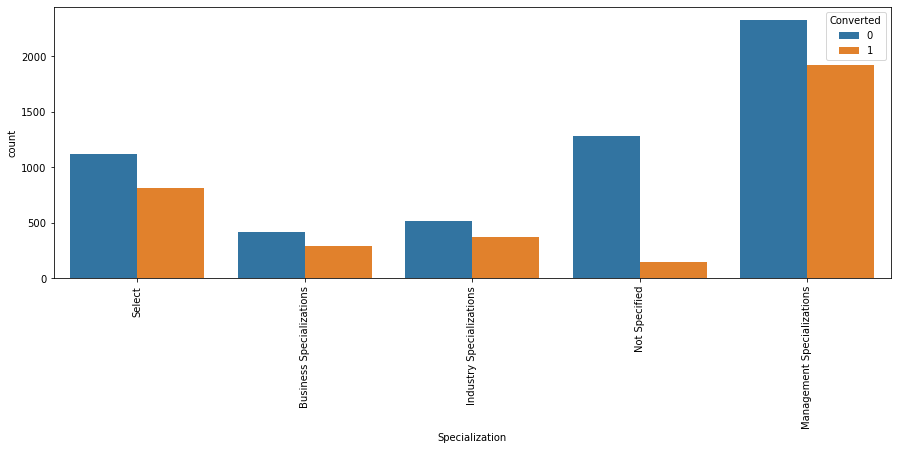

In [37]:
#Visualizing the change
plt.figure(figsize=(15,5))
s1=sns.countplot(Xed.Specialization, hue=Xed.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [38]:
Xed['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [39]:
#Assuming Nan to be unemployed

Xed['What is your current occupation'] = Xed['What is your current occupation'].replace(np.nan, 'Unemployed')

In [40]:
#Rechecking count of values
Xed['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [41]:
Xed = Xed[~pd.isnull(Xed['What is your current occupation'])]

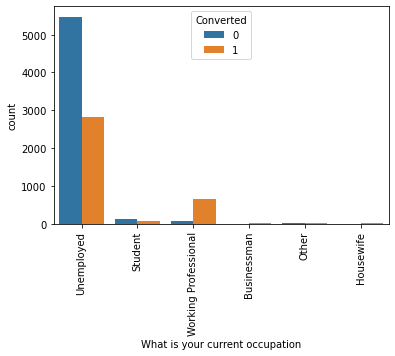

In [42]:
#Visualizing count of Variable based on Converted value

s1=sns.countplot(Xed['What is your current occupation'], hue=Xed.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Inference: Unemployed as well as Working professionals have a high chance of joining the course

In [43]:
Xed['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

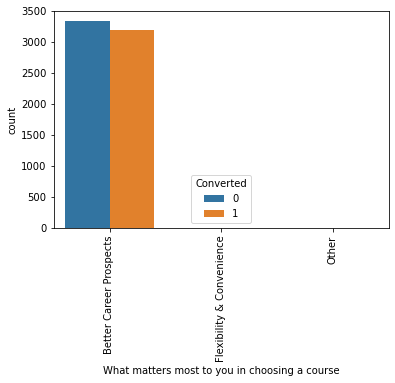

In [44]:
s1=sns.countplot(Xed['What matters most to you in choosing a course'], hue=Xed.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

The column 'What matters most to you in choosing a course' can be dropped as Better Career Prospects accounts for majority.

In [45]:
Xed.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [46]:
#Recheck count of null values
Xed.isnull().sum()

Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Specialization                                0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Update me on Supply Chain Content             0
Get updates on DM Content               

In [47]:
#Value counts of Lead Source column

Xed['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
youtubechannel          1
Pay per Click Ads       1
blog                    1
testone                 1
welearnblog_Home        1
WeLearn                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [48]:
#Replace Nan with Others
Xed['Lead Source'] = Xed['Lead Source'].replace(np.nan,'Others')

In [49]:
# Drop the null values rows in the column 'Lead Source'
Xed = Xed[~pd.isnull(Xed['Lead Source'])]

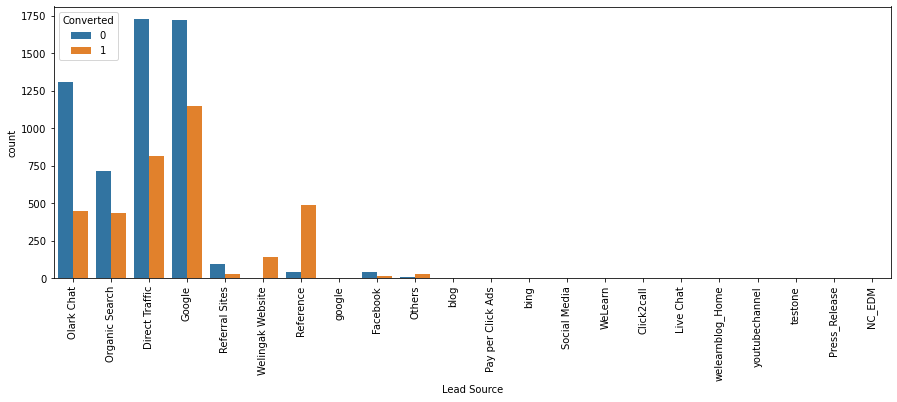

In [50]:
#Visualize based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(Xed['Lead Source'], hue=Xed.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

1. Google and Direct Traffic generate maximum traffic.
2. To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads.
3. More leads should be generated from Reference.

In [51]:
Xed['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [52]:
Xed['TotalVisits'].value_counts(dropna=False)

0.000000      2189
2.000000      1680
3.000000      1306
4.000000      1120
5.000000       783
6.000000       466
1.000000       395
7.000000       309
8.000000       224
9.000000       164
NaN            137
10.000000      114
11.000000       86
13.000000       48
12.000000       45
14.000000       36
16.000000       21
15.000000       18
17.000000       16
18.000000       15
20.000000       12
19.000000        9
23.000000        6
21.000000        6
24.000000        5
27.000000        5
25.000000        5
22.000000        3
28.000000        2
29.000000        2
26.000000        2
141.000000       1
41.000000        1
55.000000        1
115.000000       1
32.000000        1
54.000000        1
42.000000        1
251.000000       1
74.000000        1
43.000000        1
30.000000        1
Name: TotalVisits, dtype: int64

In [53]:
# Drop the null value rows in the column 'TotalVisits'

Xed = Xed[~pd.isnull(Xed['TotalVisits'])]

In [54]:
Xed.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
I agree to pay the amount through 

In [55]:
#% of rows retained
print(len(Xed.index))
print(len(Xed.index)/9240)

9103
0.9851731601731601


98% of rows have been retained.

### Univariate Analysis

In [56]:
Xed.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.000000,0,0.000000,Page Visited on Website,Select,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.000000,674,2.500000,Email Opened,Select,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.000000,1532,2.000000,Email Opened,Business Specializations,Student,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.000000,305,1.000000,Unreachable,Industry Specializations,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.000000,1428,1.000000,Converted to Lead,Select,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [57]:
Xed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9103 non-null   object 
 1   Lead Source                               9103 non-null   object 
 2   Do Not Email                              9103 non-null   object 
 3   Do Not Call                               9103 non-null   object 
 4   Converted                                 9103 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9103 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9103 non-null   object 
 9   Specialization                            9103 non-null   object 
 10  What is your current occupation     

In [58]:
Xed.shape

(9103, 24)

In [59]:
Xed.dtypes

Lead Origin                                  object
Lead Source                                  object
Do Not Email                                 object
Do Not Call                                  object
Converted                                     int64
TotalVisits                                 float64
Total Time Spent on Website                   int64
Page Views Per Visit                        float64
Last Activity                                object
Specialization                               object
What is your current occupation              object
Search                                       object
Magazine                                     object
Newspaper Article                            object
X Education Forums                           object
Newspaper                                    object
Digital Advertisement                        object
Through Recommendations                      object
Receive More Updates About Our Courses       object
Update me on

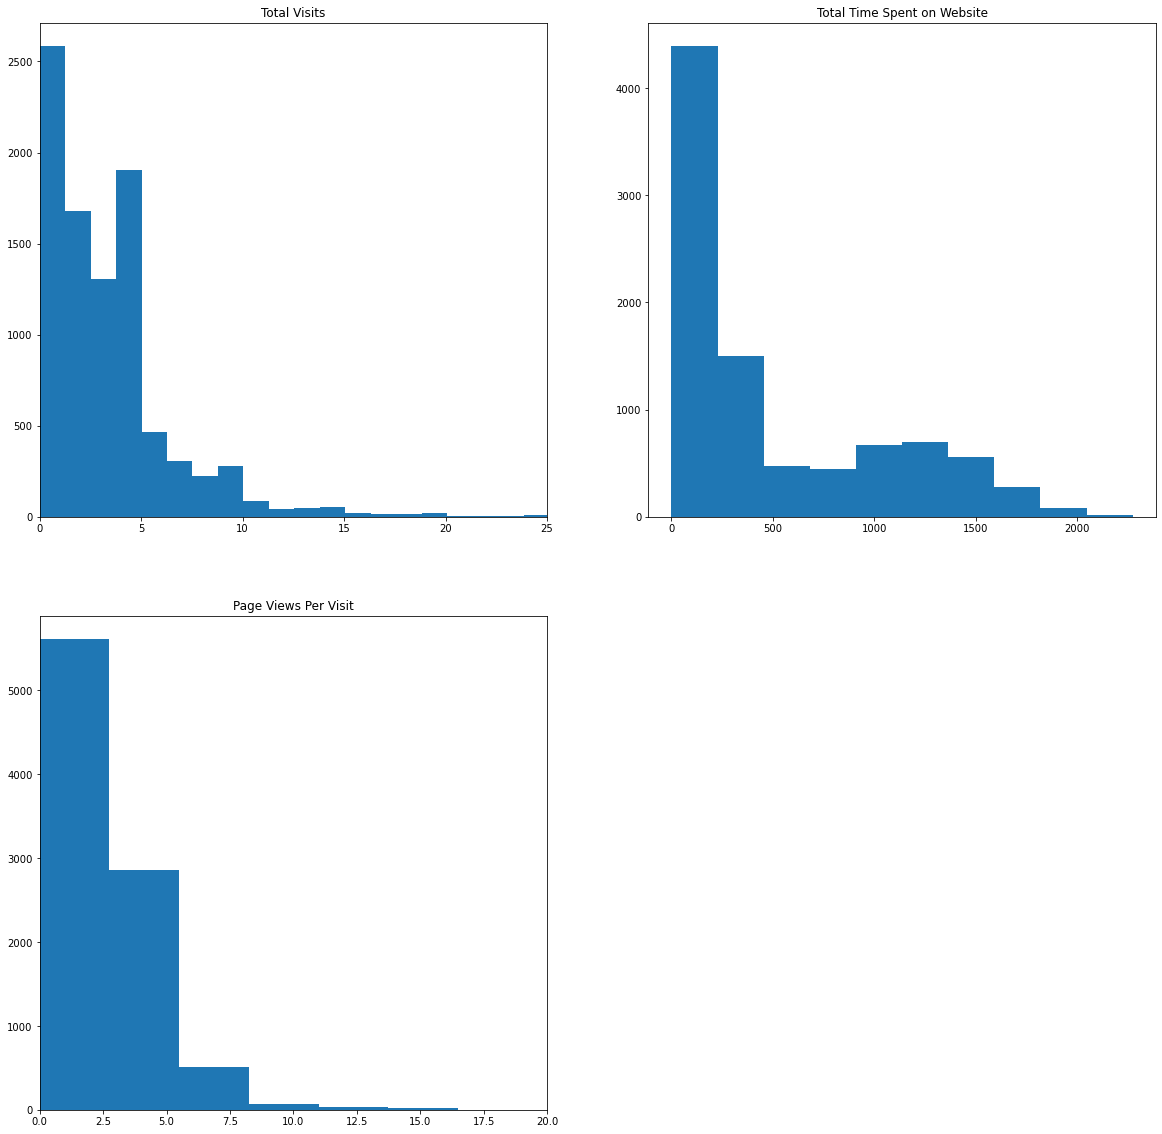

In [60]:
#Visualizing the numerical variables
plt.figure(figsize = (20,20))
plt.subplot(221)
plt.hist(Xed['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(Xed['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(Xed['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

# Visualizing relationship b/w categorical variables and Target variable(Converted)

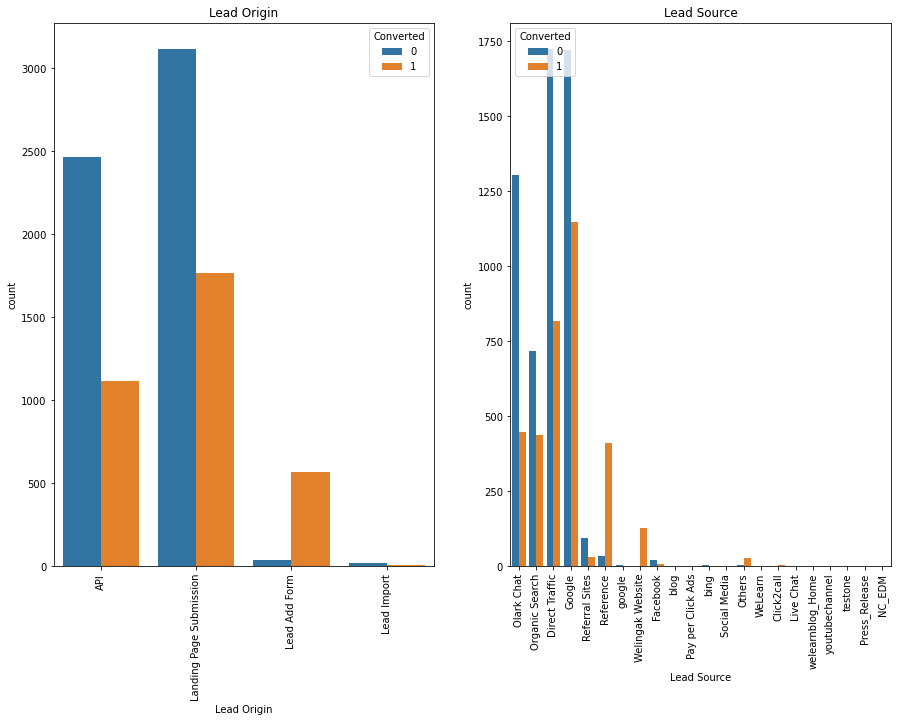

In [61]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

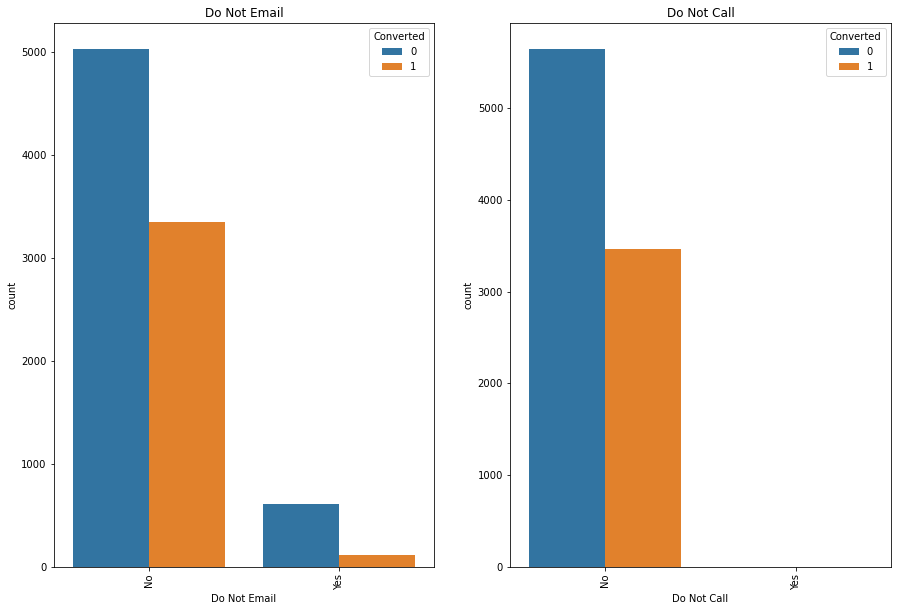

In [62]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

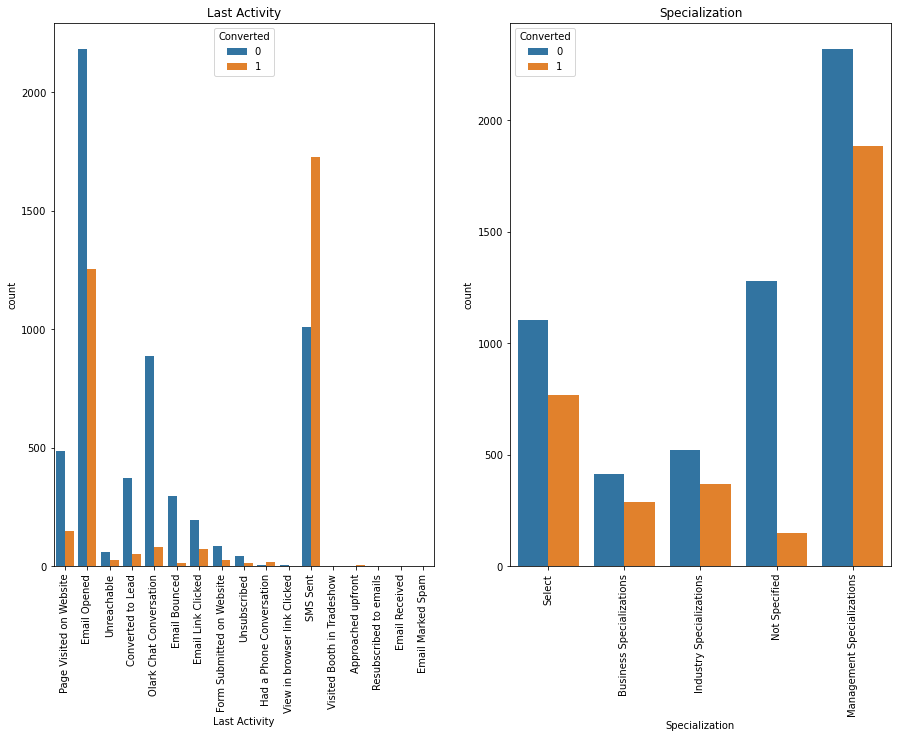

In [63]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Specialization', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()

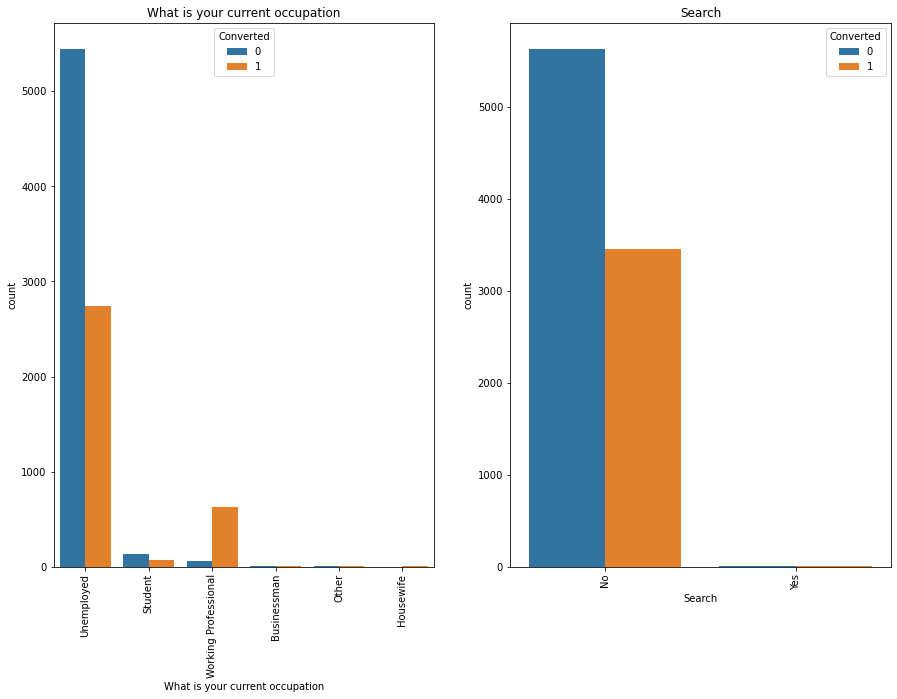

In [64]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x='What is your current occupation', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

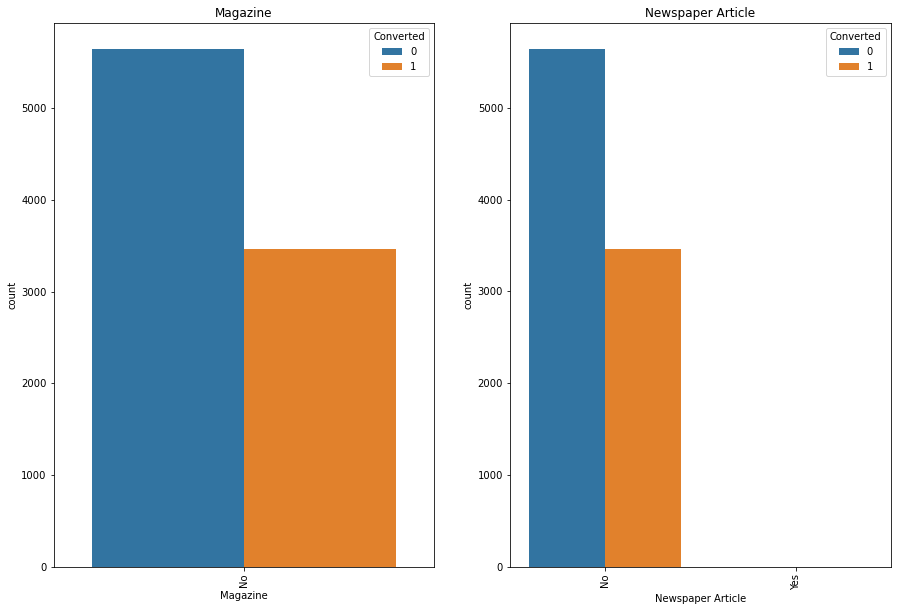

In [65]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x='Magazine', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('Magazine')

plt.subplot(1,2,2)
sns.countplot(x='Newspaper Article', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')
plt.show()

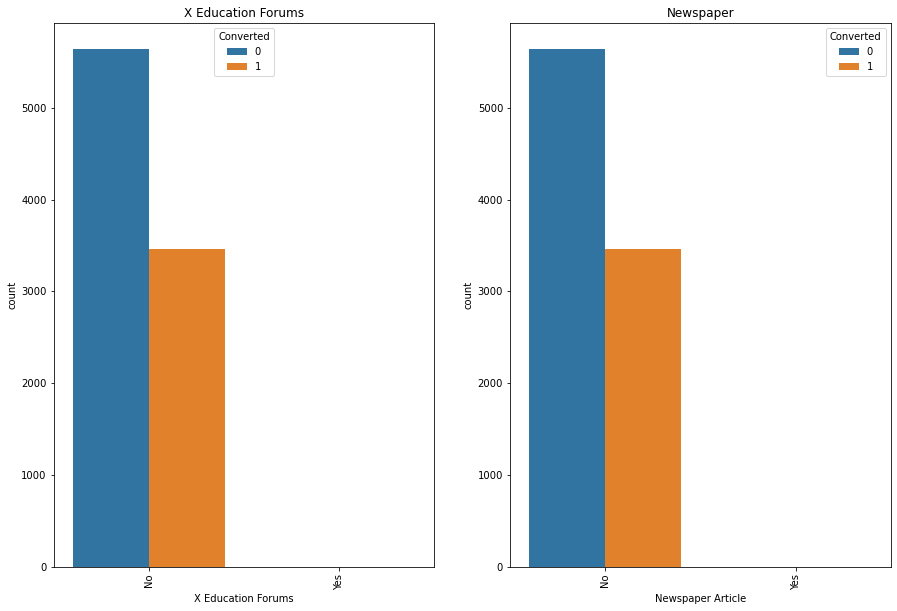

In [66]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x='X Education Forums', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.subplot(1,2,2)
sns.countplot(x='Newspaper Article', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')
plt.show()

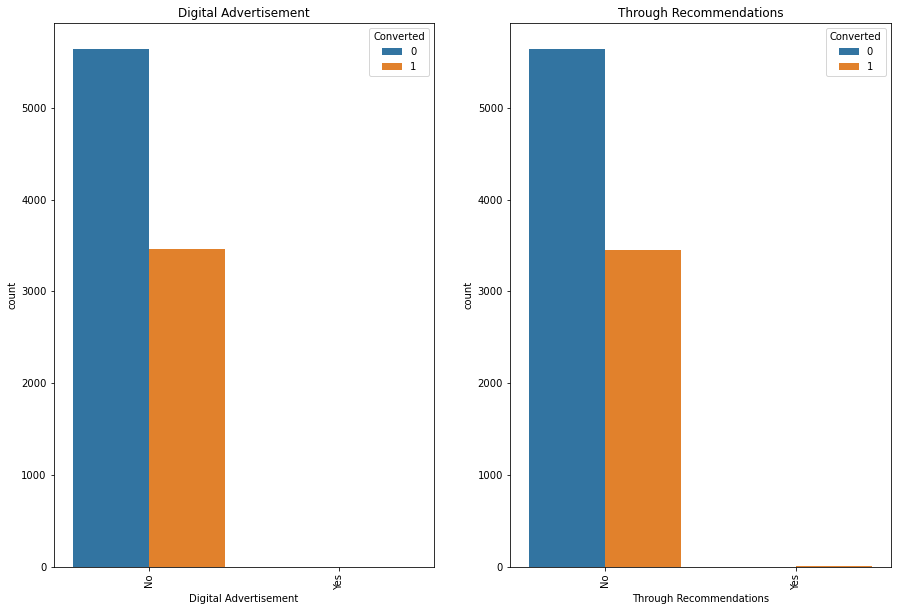

In [67]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x='Digital Advertisement', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.subplot(1,2,2)
sns.countplot(x='Through Recommendations', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')
plt.show()

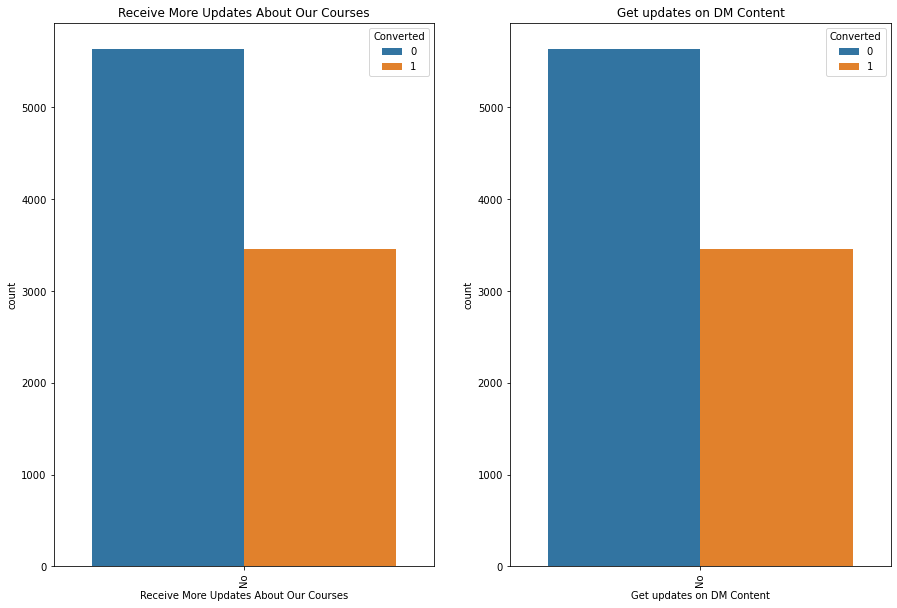

In [68]:
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(x='Receive More Updates About Our Courses', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('Receive More Updates About Our Courses')

plt.subplot(1,2,2)
sns.countplot(x='Get updates on DM Content', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('Get updates on DM Content')
plt.show()

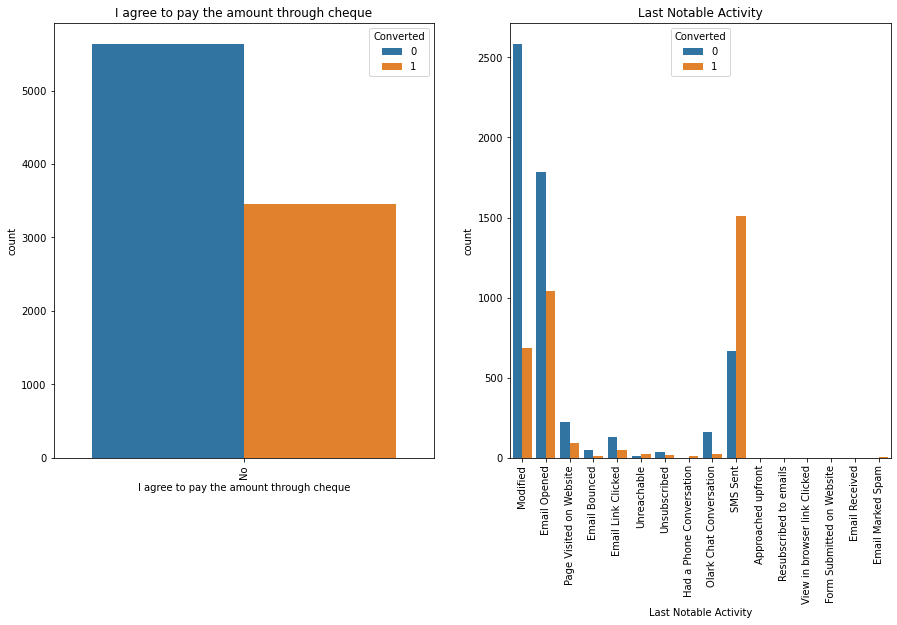

In [69]:
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.countplot(x='I agree to pay the amount through cheque', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('I agree to pay the amount through cheque')

plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data=Xed).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

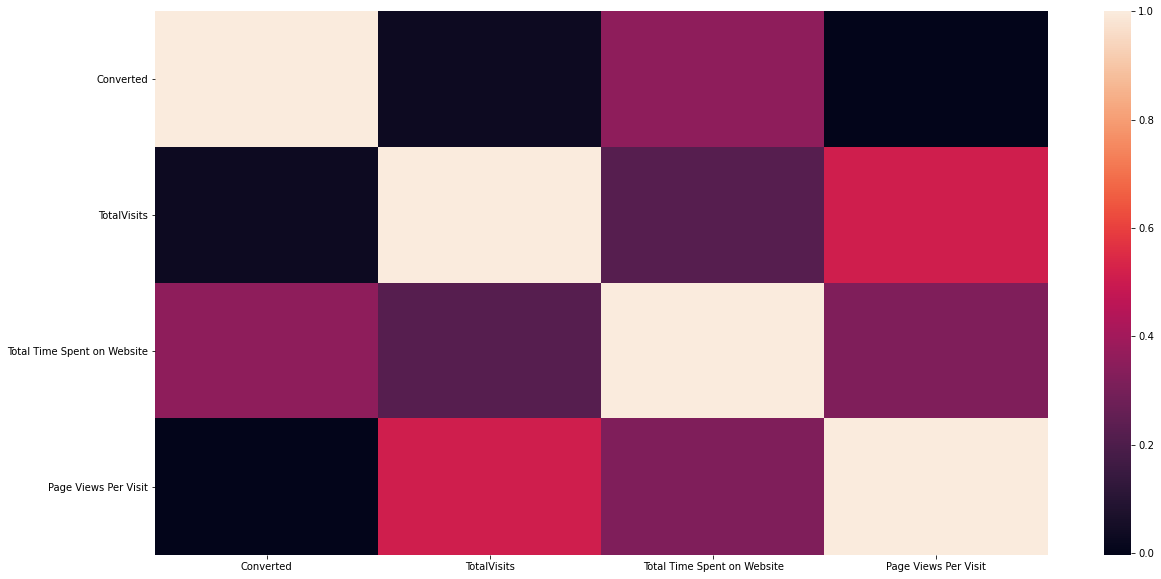

In [70]:
# To check the correlation among varibles
plt.figure(figsize=(20,10))
sns.heatmap(Xed.corr())
plt.show()

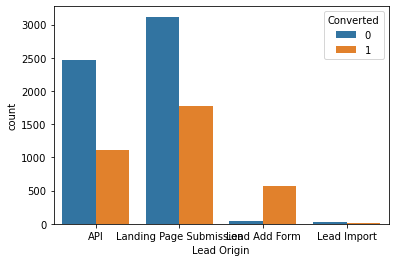

In [71]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = Xed)
#xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='TotalVisits'>

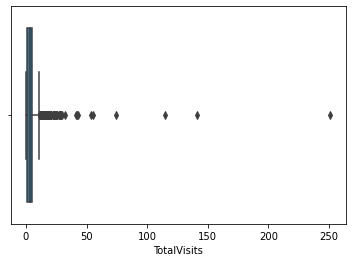

In [72]:
sns.boxplot(Xed['TotalVisits'])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

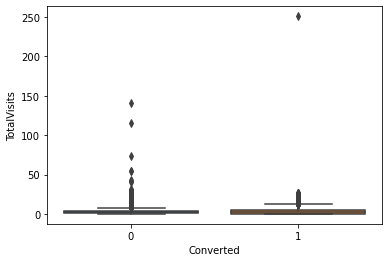

In [73]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = Xed)

In [74]:
Xed['Total Time Spent on Website'].describe()

count   9103.000000
mean     481.350104
std      545.066142
min        0.000000
25%        9.000000
50%      244.000000
75%      919.500000
max     2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:xlabel='Total Time Spent on Website'>

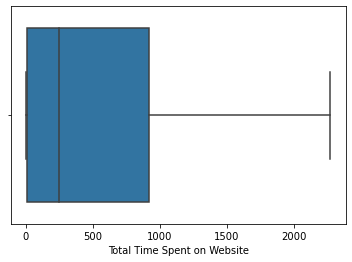

In [75]:
sns.boxplot(Xed['Total Time Spent on Website'])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

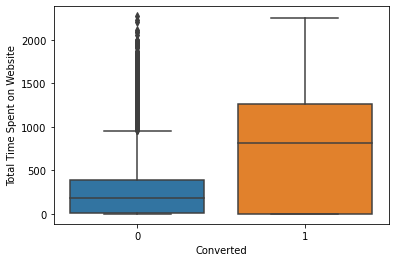

In [76]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = Xed)

In [77]:
Xed['Page Views Per Visit'].describe()

count   9103.000000
mean       2.362820
std        2.161418
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Page Views Per Visit'>

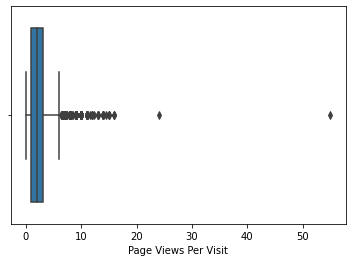

In [78]:
sns.boxplot(Xed['Page Views Per Visit'])

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

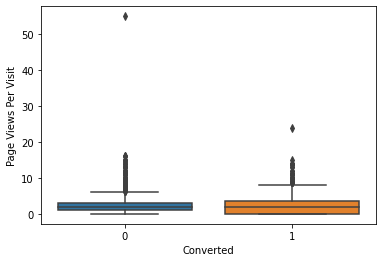

In [79]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = Xed)

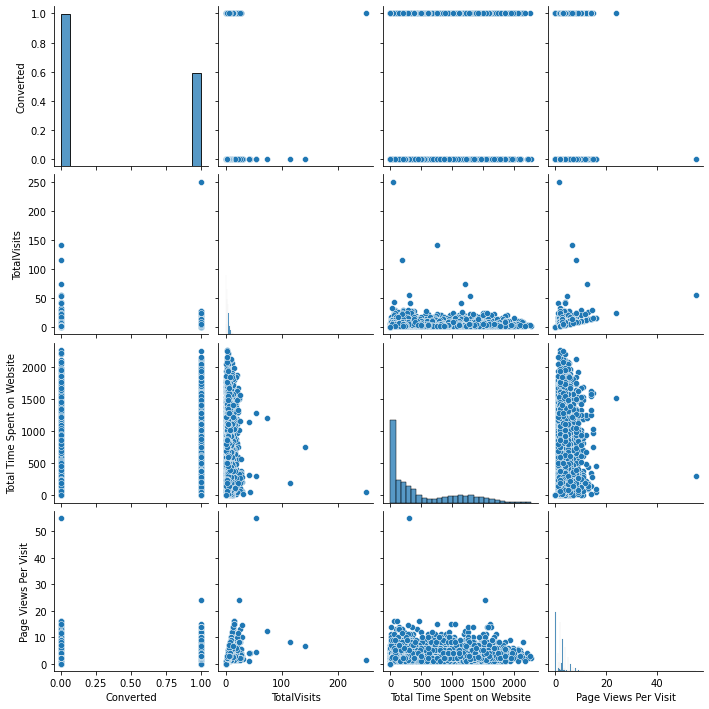

In [80]:
sns.pairplot(Xed)

In [81]:
#Getting all categorical columns
cat_columns = Xed.dtypes[Xed.dtypes =='object'].index
cat_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [82]:
num_columns = Xed.dtypes[Xed.dtypes !='object'].index
num_columns

Index(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'],
      dtype='object')

In [83]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(Xed['Converted'])/len(Xed['Converted'].index))*100
Converted

38.02043282434362

## Dummy variable creation

In [84]:
#Creating dummies for all categorical columns
lead = pd.get_dummies(Xed, drop_first = True)
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Industry Specializations,Specialization_Management Specializations,Specialization_Not Specified,Specialization_Select,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.000000,0,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.000000,674,2.500000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.000000,1532,2.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.000000,305,1.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.000000,1428,1.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [85]:
lead.shape

(9103, 77)

In [86]:
#Separating the target column
y = lead.pop('Converted')
X = lead

In [87]:
#Removing Converted from numerical columns list
num_columns = num_columns.drop('Converted')
num_columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [88]:
#Splitting the dataset in 70-30 ratio into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 42)

In [89]:

X_train.shape

(6372, 76)

In [90]:

X_test.shape

(2731, 76)

In [91]:
#Scaling the numerical data using Min-Max Scaler
scaler = MinMaxScaler()

X_train[num_columns] = scaler.fit_transform(X_train[num_columns])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Industry Specializations,Specialization_Management Specializations,Specialization_Not Specified,Specialization_Select,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3360,0.011952,0.518486,0.125000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
436,0.011952,0.020246,0.125000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8236,0.023904,0.305018,0.125000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3034,0.003984,0.548856,0.041667,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2776,0.007968,0.030810,0.041667,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [92]:
#Checking the present lead conversion rate
convert = (sum(Xed['Converted'])/len(Xed['Converted'].index))*100
convert

38.02043282434362

## Model Building

### Running First Model

In [93]:
#Model 1
X_train_sm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
X_train_sm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2538.5
Date:                Tue, 26 Oct 2021   Deviance:                       5077.0
Time:                        21:42:28   Pearson chi2:                 6.31e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.7160    8.2e+04      0.000      1.000   -1.61e+05    1.61e+05
TotalVisits                                              8.9703      2.905      3.088      0.002       3.277      14.663
Total Time Spent on Website                              4.3984      0.168     26.171      0.000       4.069       4.728
Page Views Per Visit                                    -1.6304      0.600     -2.719      0.007      -2.806      -0.455
Lead Origin_Landing Page Submission                     -0.9938      0.140     -7.108      0.000      -1.268      -0.720
Lead Origin_Lead Add Form                                0.3848      1.332      0.289      0.773      -2.226       2.996
Lead Origin_Lead Import                                 -0.3082      1.629     -0.189      0.850      -3.501       2.885
Lead Source_Direct Traffic                              -1.2946      1.821     -0.711      0.477      -4.864       2.275
Lead Source_Facebook                                    -0.3738      2.086     -0.179      0.858      -4.461       3.714
Lead Source_Google                                      -1.1129      1.819     -0.612      0.541      -4.678       2.453
Lead Source_Live Chat                                   22.5030   5.69e+04      0.000      1.000   -1.12e+05    1.12e+05
Lead Source_NC_EDM                                      22.5166   7.76e+04      0.000      1.000   -1.52e+05    1.52e+05
Lead Source_Olark Chat                                  -0.0995      1.817     -0.055      0.956      -3.661       3.462
Lead Source_Organic Search                              -1.1531      1.822     -0.633      0.527      -4.725       2.418
Lead Source_Others                                       1.3972      1.427      0.979      0.328      -1.400       4.194
Lead Source_Pay per Click Ads                          -22.7402   7.79e+04     -0.000      1.000   -1.53e+05    1.53e+05
Lead Source_Press_Release                              -21.7742   5.11e+04     -0.000      1.000      -1e+05       1e+05
Lead Source_Reference                                    1.5587      1.261      1.236      0.217      -0.913       4.031
Lead Source_Referral Sites                              -1.3247      1.846     -0.717      0.473      -4.944       2.294
Lead Source_Social Media                                23.2132   7.86e+04      0.000      1.000   -1.54e+05    1.54e+05
Lead Source_WeLearn                                     22.3672   8.34e+04      0.000      1.000   -1.63e+05    1.64e+05
Lead Source_Welingak Website                             4.3708      1.604      2.725      0.006       1.227       7.515
Lead Source_bing                                        -0

It is highly inconvenient to iterate the features individually. Let's use RFE to get 15 best features

In [94]:

#Import Library required 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

In [95]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [96]:
rfe.support_

array([ True,  True,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False,  True,  True,  True, False,
       False, False, False, False])

In [97]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_NC_EDM', False, 31),
 ('Lead Source_Olark Chat', False, 25),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Others', False, 24),
 ('Lead Source_Pay per Click Ads', False, 47),
 ('Lead Source_Press_Release', False, 45),
 ('Lead Source_Reference', False, 23),
 ('Lead Source_Referral Sites', False, 5),
 ('Lead Source_Social Media', False, 22),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 57),
 ('Lead Source_blog', False, 34),
 ('Lead Source_google', False, 17),
 ('Lead Source_testone', False, 43),
 ('Lead Sourc

In [98]:
col_rfe = X_train.columns[rfe.support_]

In [99]:
X_train.columns[~rfe.support_]

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Do Not Call_Yes', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website

In [100]:
#Model 2
X_train_sm = sm.add_constant(X_train[col_rfe])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2714.8
Date:                Tue, 26 Oct 2021   Deviance:                       5429.7
Time:                        21:42:37   Pearson chi2:                 6.51e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4860      0.218      2.227      0.026       0.058       0.914
TotalVisits                                              7.1199      2.442      2.916      0.004       2.334      11.905
Total Time Spent on Website                              3.9923      0.150     26.581      0.000       3.698       4.287
Page Views Per Visit                                    -3.4324      0.506     -6.785      0.000      -4.424      -2.441
Lead Origin_Lead Add Form                                3.3458      0.224     14.953      0.000       2.907       3.784
Lead Source_Welingak Website                             2.4753      1.036      2.389      0.017       0.445       4.506
Do Not Email_Yes                                        -1.8906      0.167    -11.310      0.000      -2.218      -1.563
Last Activity_Converted to Lead                         -1.4095      0.217     -6.482      0.000      -1.836      -0.983
Last Activity_Olark Chat Conversation                   -1.1041      0.184     -6.010      0.000      -1.464      -0.744
What is your current occupation_Unemployed              -0.6299      0.203     -3.099      0.002      -1.028      -0.232
What is your current occupation_Working Professional     2.2777      0.282      8.091      0.000       1.726       2.829
Last Notable Activity_Email Link Clicked                -2.0169      0.276     -7.319      0.000      -2.557      -1.477
Last Notable Activity_Email Opened                      -1.4762      0.087    -16.942      0.000      -1.647      -1.305
Last Notable Activity_Modified                          -1.6509      0.097    -17.047      0.000      -1.841      -1.461
Last Notable Activity_Olark Chat Conversation           -1.5499      0.373     -4.154      0.000      -2.281      -0.819
Last Notable Activity_Page Visited on Website           -1.9969      0.210     -9.498      0.000      -2.409      -1.585
========================================================================================================================
"""

Lead Origin_Lead Add Form and What is your current occupation_Working Professional have high p value ( greater than 0.05) which make them insignificant.We should remove them.

In [101]:
#lets check VIF and then drop 1 by 1

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
X_train_sm = X_train_sm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,5.910000
2,Page Views Per Visit,3.330000
12,Last Notable Activity_Modified,2.890000
11,Last Notable Activity_Email Opened,2.110000
1,Total Time Spent on Website,2.100000
0,TotalVisits,2.010000
7,Last Activity_Olark Chat Conversation,1.850000
3,Lead Origin_Lead Add Form,1.530000
9,What is your current occupation_Working Profes...,1.470000
13,Last Notable Activity_Olark Chat Conversation,1.390000


Let's remove What is your occupation_Unemployed first

In [103]:
X_train_sm = X_train_sm.drop(["What is your current occupation_Unemployed"], axis = 1)

In [104]:
# model 3

#Build model again

X_train_sm = sm.add_constant(X_train_sm)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2719.5
Date:                Tue, 26 Oct 2021   Deviance:                       5439.1
Time:                        21:42:39   Pearson chi2:                 6.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1378      0.085     -1.624      0.104      -0.304       0.029
TotalVisits                                              7.0540      2.437      2.895      0.004       2.278      11.830
Total Time Spent on Website                              3.9972      0.150     26.637      0.000       3.703       4.291
Page Views Per Visit                                    -3.4326      0.505     -6.793      0.000      -4.423      -2.442
Lead Origin_Lead Add Form                                3.3687      0.223     15.075      0.000       2.931       3.807
Lead Source_Welingak Website                             2.4345      1.036      2.350      0.019       0.404       4.465
Do Not Email_Yes                                        -1.8841      0.167    -11.257      0.000      -2.212      -1.556
Last Activity_Converted to Lead                         -1.4093      0.218     -6.474      0.000      -1.836      -0.983
Last Activity_Olark Chat Conversation                   -1.1035      0.184     -6.010      0.000      -1.463      -0.744
What is your current occupation_Working Professional     2.8887      0.201     14.336      0.000       2.494       3.284
Last Notable Activity_Email Link Clicked                -1.9961      0.275     -7.262      0.000      -2.535      -1.457
Last Notable Activity_Email Opened                      -1.4591      0.087    -16.810      0.000      -1.629      -1.289
Last Notable Activity_Modified                          -1.6395      0.097    -16.956      0.000      -1.829      -1.450
Last Notable Activity_Olark Chat Conversation           -1.5041      0.370     -4.062      0.000      -2.230      -0.778
Last Notable Activity_Page Visited on Website           -1.9829      0.210     -9.441      0.000      -2.395      -1.571
========================================================================================================================
"""

In [105]:
# Lead Source_Welingak Website have quite high p value, lets remove it too

X_train_sm = X_train_sm.drop(['Lead Source_Welingak Website'], axis = 1)

# build model again 
#Model 4

X_train_sm = sm.add_constant(X_train_sm)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2725.2
Date:                Tue, 26 Oct 2021   Deviance:                       5450.3
Time:                        21:42:39   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1381      0.085     -1.628      0.103      -0.304       0.028
TotalVisits                                              7.0308      2.435      2.887      0.004       2.258      11.803
Total Time Spent on Website                              3.9959      0.150     26.635      0.000       3.702       4.290
Page Views Per Visit                                    -3.4275      0.505     -6.786      0.000      -4.417      -2.438
Lead Origin_Lead Add Form                                3.6811      0.217     16.995      0.000       3.257       4.106
Do Not Email_Yes                                        -1.8711      0.166    -11.259      0.000      -2.197      -1.545
Last Activity_Converted to Lead                         -1.4074      0.218     -6.467      0.000      -1.834      -0.981
Last Activity_Olark Chat Conversation                   -1.1039      0.184     -6.008      0.000      -1.464      -0.744
What is your current occupation_Working Professional     2.8809      0.202     14.280      0.000       2.485       3.276
Last Notable Activity_Email Link Clicked                -1.9954      0.275     -7.268      0.000      -2.534      -1.457
Last Notable Activity_Email Opened                      -1.4593      0.087    -16.818      0.000      -1.629      -1.289
Last Notable Activity_Modified                          -1.6403      0.097    -16.977      0.000      -1.830      -1.451
Last Notable Activity_Olark Chat Conversation           -1.4809      0.367     -4.039      0.000      -2.199      -0.762
Last Notable Activity_Page Visited on Website           -1.9796      0.210     -9.444      0.000      -2.390      -1.569
========================================================================================================================
"""

In [106]:
#Lets see VIF of the model

vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.670000
11,Last Notable Activity_Modified,1.960000
7,Last Activity_Olark Chat Conversation,1.660000
10,Last Notable Activity_Email Opened,1.600000
3,Page Views Per Visit,1.510000
12,Last Notable Activity_Olark Chat Conversation,1.380000
1,TotalVisits,1.370000
4,Lead Origin_Lead Add Form,1.220000
2,Total Time Spent on Website,1.200000
6,Last Activity_Converted to Lead,1.190000



All variables have a good value of VIF(VIF value leass than 2). So we need not drop any more variables and we can proceed with making predictions using this model only

In [107]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3360   0.830515
436    0.083397
8236   0.305767
3034   0.981675
2776   0.149045
2420   0.482466
6304   0.128122
1421   0.175104
308    0.717074
7230   0.151043
dtype: float64

In [108]:

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.83051547, 0.08339723, 0.30576708, 0.98167539, 0.14904471,
       0.48246556, 0.12812211, 0.17510419, 0.71707437, 0.15104321])

In [109]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,1,0.830515,3360
1,0,0.083397,436
2,0,0.305767,8236
3,1,0.981675,3034
4,0,0.149045,2776


In [120]:
from sklearn import metrics

In [121]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [122]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

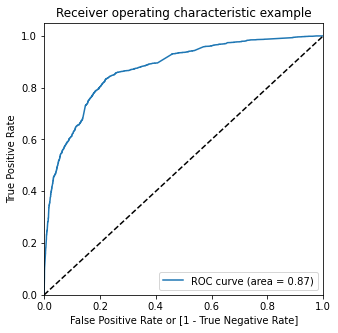

In [123]:

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [113]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.830515,3360,1,1,1,1,1,1,1,1,1,0
1,0,0.083397,436,1,0,0,0,0,0,0,0,0,0
2,0,0.305767,8236,1,1,1,1,0,0,0,0,0,0
3,1,0.981675,3034,1,1,1,1,1,1,1,1,1,1
4,0,0.149045,2776,1,1,0,0,0,0,0,0,0,0


In [124]:

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

             prob  accuracy    sensi    speci
0.000000 0.000000  0.381984 1.000000 0.000000
0.100000 0.100000  0.554614 0.978636 0.292534
0.200000 0.200000  0.751883 0.873048 0.676993
0.300000 0.300000  0.797081 0.836072 0.772981
0.400000 0.400000  0.805085 0.787592 0.815896
0.500000 0.500000  0.793315 0.656122 0.878111
0.600000 0.600000  0.791588 0.570666 0.928136
0.700000 0.700000  0.778092 0.495070 0.953022
0.800000 0.800000  0.758318 0.410846 0.973083
0.900000 0.900000  0.702605 0.235826 0.991112


In [125]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

             prob  accuracy    sensi    speci
0.000000 0.000000  0.381984 1.000000 0.000000
0.100000 0.100000  0.554614 0.978636 0.292534
0.200000 0.200000  0.751883 0.873048 0.676993
0.300000 0.300000  0.797081 0.836072 0.772981
0.400000 0.400000  0.805085 0.787592 0.815896
0.500000 0.500000  0.793315 0.656122 0.878111
0.600000 0.600000  0.791588 0.570666 0.928136
0.700000 0.700000  0.778092 0.495070 0.953022
0.800000 0.800000  0.758318 0.410846 0.973083
0.900000 0.900000  0.702605 0.235826 0.991112


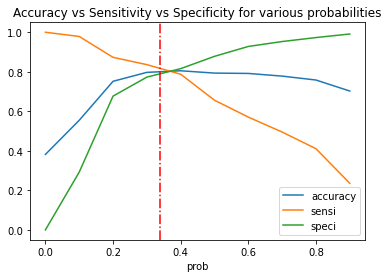

In [126]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(0.34,linestyle='-.',color='r')
plt.title('Accuracy vs Sensitivity vs Specificity for various probabilities')
plt.show()

From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [127]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.830515,3360,1,1,1,1,1,1,1,1,1,0,1
1,0,0.083397,436,1,0,0,0,0,0,0,0,0,0,0
2,0,0.305767,8236,1,1,1,1,0,0,0,0,0,0,0
3,1,0.981675,3034,1,1,1,1,1,1,1,1,1,1,1
4,0,0.149045,2776,1,1,0,0,0,0,0,0,0,0,0


In [129]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3110,  828],
       [ 442, 1992]], dtype=int64)

In [130]:

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [131]:
print("Statistics for model at cutoff value for Converted_prob > 0.34")
print("")
# Let's check the overall accuracy.
print('Overall_Accuaracy :{0}'.format(round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted),2)))

sensitivity = round(TP / float(TP+FN),2)
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :{0}'.format(sensitivity))

specificity = round(TN / float(TN+FP),2)

# Let us calculate specificity
print('Specificity : {0}'.format(specificity))

# Calculate false postive rate - predicting lead when customer does not convert
print('False positive rate : {0}'.format(round(FP/ float(TN+FP),2)))

precision = round(TP / float(TP+FP),2)
# positive predictive value (Precision)
print ('Precision(Positive predictive Value) : {0}'.format(precision))

# Negative predictive value
print ('Negative predictive Value : {0}'.format(round(TN / float(TN+ FN),2)))

print("")

print("Sensitivity - Specificity : {0} , {1}".format(sensitivity,specificity))

print("Precision - Recall : {0} , {1}".format(precision,sensitivity))

print("F1 score is : {0} ".format(2*(precision*sensitivity)/(precision+sensitivity)))

Statistics for model at cutoff value for Converted_prob > 0.34

Overall_Accuaracy :0.8
Sensitivity :0.82
Specificity : 0.79
False positive rate : 0.21
Precision(Positive predictive Value) : 0.71
Negative predictive Value : 0.88

Sensitivity - Specificity : 0.82 , 0.79
Precision - Recall : 0.71 , 0.82
F1 score is : 0.7610457516339869 


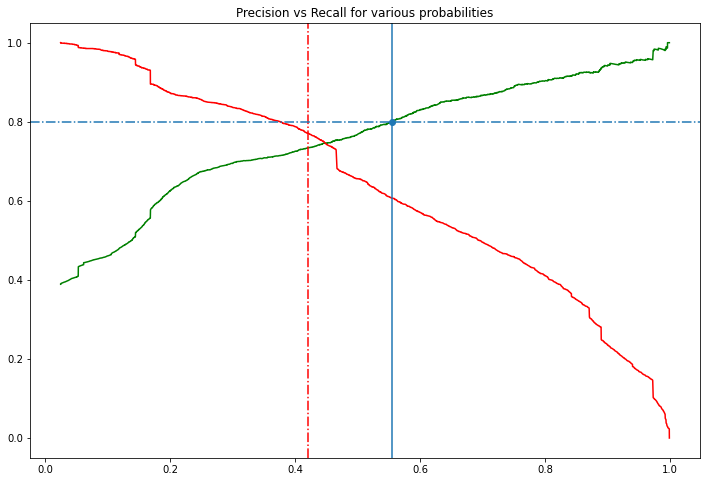

In [135]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.figure(figsize=(12,8))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision vs Recall for various probabilities')
plt.axvline(0.42,linestyle='-.',color='r')  #optimal cutoff as per the curve

plt.plot(np.interp (0.80, p[:-1], thresholds),0.8,'o')  # need to find threshold where precision is 0.8
plt.axhline(0.80,linestyle='-.')
plt.axvline(np.interp (0.80, p[:-1], thresholds))
plt.show()

In [136]:
round(np.interp (0.80, p[:-1], thresholds),3)

0.554

In [137]:
#Lets take cuttoff as 0.55 to get precision value of 0.8
y_train_pred_final['final_predicted_pr'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.554 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_predicted_pr
0,1,0.830515,3360,1,1,1,1,1,1,1,1,1,0,1,1
1,0,0.083397,436,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.305767,8236,1,1,1,1,0,0,0,0,0,0,0,0
3,1,0.981675,3034,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.149045,2776,1,1,0,0,0,0,0,0,0,0,0,0


In [138]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_pr )
confusion2

array([[3568,  370],
       [ 955, 1479]], dtype=int64)

In [140]:

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [141]:
print("Statistics for model at cutoff value for Converted_prob > 0.513")
print("")
# Let's check the overall accuracy.
print('Overall_Accuaracy :{0}'.format(round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_pr),2)))

sensitivity = round(TP / float(TP+FN),2)
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :{0}'.format(sensitivity))

specificity = round(TN / float(TN+FP),2)

# Let us calculate specificity
print('Specificity : {0}'.format(specificity))

# Calculate false postive rate - predicting lead when customer does not convert
print('False positive rate : {0}'.format(round(FP/ float(TN+FP),2)))

precision = round(TP / float(TP+FP),2)
# positive predictive value (Precision)
print ('Precision(Positive predictive Value) : {0}'.format(precision))

# Negative predictive value
print ('Negative predictive Value : {0}'.format(round(TN / float(TN+ FN),2)))

print("")

print("Sensitivity - Specificity : {0} , {1}".format(sensitivity,specificity))

print("Precision - Recall : {0} , {1}".format(precision,sensitivity))

print("F1 score is : {0} ".format(2*(precision*sensitivity)/(precision+sensitivity)))

Statistics for model at cutoff value for Converted_prob > 0.513

Overall_Accuaracy :0.79
Sensitivity :0.61
Specificity : 0.91
False positive rate : 0.09
Precision(Positive predictive Value) : 0.8
Negative predictive Value : 0.79

Sensitivity - Specificity : 0.61 , 0.91
Precision - Recall : 0.8 , 0.61
F1 score is : 0.6921985815602836 


We need positive predictive value or precision at 0.8 which will ensure conversion ratio of 80% and with cutoff for converted prob value as 0.554 is giving us 0.80 precision value. Hence we will go with cutoff of 0.554.

## Model Evaluation

In [142]:
X_test[num_columns] = scaler.transform(X_test[num_columns])

In [143]:
X_test = X_test[X_train_sm.columns[1:]]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
7999,0.003984,0.093310,0.041667,0,0,1,0,0,0,0,1,0,0
4317,0.011952,0.056338,0.125000,0,0,0,0,0,0,1,0,0,0
5468,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,1,0,0
2220,0.007968,0.196743,0.083333,0,0,0,0,0,0,1,0,0,0
3766,0.015936,0.045335,0.166667,0,0,0,0,0,0,1,0,0,0


In [144]:

X_test_sm = sm.add_constant(X_test)

### Making predictions on Test data

In [145]:
y_test_pred = res.predict(X_test_sm)

In [146]:
y_test_pred[:10]

7999   0.050798
4317   0.152299
5468   0.053032
2220   0.260989
3766   0.132912
3595   0.053032
4112   0.939501
1455   0.453812
7064   0.448228
5657   0.343504
dtype: float64

In [147]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

y_pred_1.head()

,0
7999,0.050798
4317,0.152299
5468,0.053032
2220,0.260989
3766,0.132912


In [148]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)


# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [149]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [150]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Lead Number,0
0,0,7999,0.050798
1,1,4317,0.152299
2,0,5468,0.053032
3,0,2220,0.260989
4,0,3766,0.132912


In [152]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead Number,Converted_Prob
0,0,7999,0.050798
1,1,4317,0.152299
2,0,5468,0.053032
3,0,2220,0.260989
4,0,3766,0.132912


In [154]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.554 else 0)
y_pred_final.head()

,Converted,Lead Number,Converted_Prob,final_predicted
0,0,7999,0.050798,0
1,1,4317,0.152299,0
2,0,5468,0.053032,0
3,0,2220,0.260989,0
4,0,3766,0.132912,0


In [155]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1554,  150],
       [ 392,  635]], dtype=int64)

In [156]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [157]:
print("Statistics for model at cutoff value for Converted_prob > 0.513")
print("")
# Let's check the overall accuracy.
print('Overall_Accuaracy :{0}'.format(round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted),2)))

sensitivity = round(TP / float(TP+FN),2)
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :{0}'.format(sensitivity))

specificity = round(TN / float(TN+FP),2)

# Let us calculate specificity
print('Specificity : {0}'.format(specificity))

# Calculate false postive rate - predicting lead when customer does not convert
print('False positive rate : {0}'.format(round(FP/ float(TN+FP),2)))

precision = round(TP / float(TP+FP),2)
# positive predictive value (Precision)
print ('Precision(Positive predictive Value) : {0}'.format(precision))

# Negative predictive value
print ('Negative predictive Value : {0}'.format(round(TN / float(TN+ FN),2)))

print("")

print("Sensitivity - Specificity : {0} , {1}".format(sensitivity,specificity))

print("Precision - Recall : {0} , {1}".format(precision,sensitivity))

print("F1 score is : {0} ".format(2*(precision*sensitivity)/(precision+sensitivity)))

Statistics for model at cutoff value for Converted_prob > 0.513

Overall_Accuaracy :0.8
Sensitivity :0.62
Specificity : 0.91
False positive rate : 0.09
Precision(Positive predictive Value) : 0.81
Negative predictive Value : 0.8

Sensitivity - Specificity : 0.62 , 0.91
Precision - Recall : 0.81 , 0.62
F1 score is : 0.7023776223776222 


In [158]:
# Assigning lead score for test set 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob']*100

y_pred_final.sort_values(by = 'Lead_Score',ascending = False).head()

,Converted,Lead Number,Converted_Prob,final_predicted,Lead_Score
1888,1,818,0.998986,1,99.898558
802,1,8112,0.998380,1,99.838013
1084,1,4771,0.998380,1,99.838013
1653,1,2658,0.998380,1,99.838013
1666,1,5819,0.998380,1,99.838013
